In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Load the wine dataset from scikit-learn
wine_data = load_wine()

# Create a DataFrame from the dataset
wine_df = pd.DataFrame(data=np.c_[wine_data['data'], wine_data['target']],
                       columns=wine_data['feature_names'] + ['target'])
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [ ]:
# Split the dataset into features (X) and target (y)
X = wine_df.drop('target', axis=1)  # Features
y = wine_df['target']  # Target variable
# print(X)
print(y)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
173    2.0
174    2.0
175    2.0
176    2.0
177    2.0
Name: target, Length: 178, dtype: float64


In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.07
R-squared: 0.88


In [ ]:
# Define new data points
new_data_points = np.array([[13.5, 2.5, 2.6, 20.0, 95.0, 2.5, 2.5, 0.3, 1.25, 8.5, 0.5, 1.5, 650.0],
                            [12.0, 1.5, 2.1, 18.0, 88.0, 2.3, 2.5, 0.2, 1.0, 7.2, 0.6, 1.3, 550.0]])

# Use the trained model to make predictions for the new data points
predictions = model.predict(new_data_points)

# Print the predicted wine quality for the new data points
for i, prediction in enumerate(predictions):
    print(f"Predicted Wine Quality for Data Point {i+1}: {prediction:.2f}")


Predicted Wine Quality for Data Point 1: 1.43
Predicted Wine Quality for Data Point 2: 1.58


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


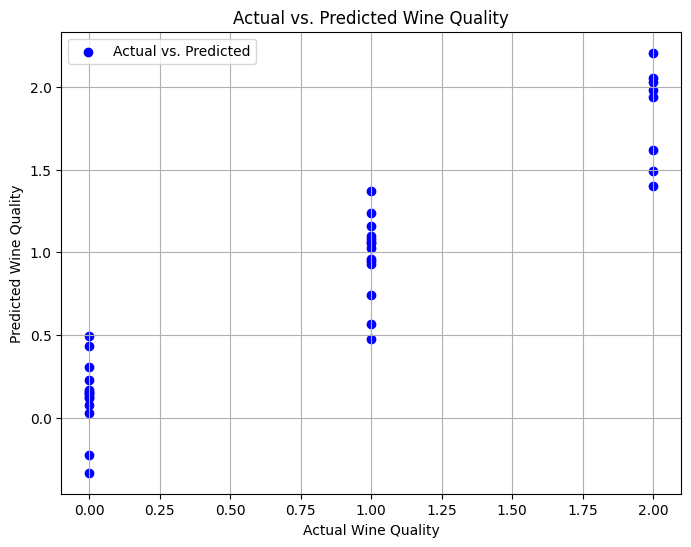

In [ ]:
# Create a scatter plot to visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o', label='Actual vs. Predicted')
plt.xlabel("Actual Wine Quality")
plt.ylabel("Predicted Wine Quality")
plt.title("Actual vs. Predicted Wine Quality")
plt.legend(loc='best')
plt.grid(True)
plt.show()

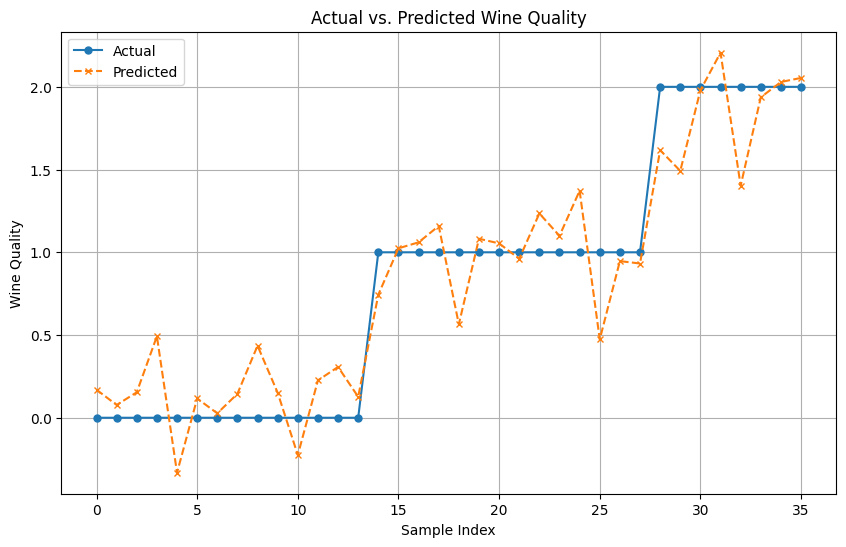

In [ ]:
# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# Create an array of indices for sorting the actual values
sorted_indices = np.argsort(y_test)

# Sort the actual and predicted values based on the sorted indices
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Create a line plot to visualize the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test_sorted, label='Actual', marker='o', markersize=5)
plt.plot(range(len(y_test)), y_pred_sorted, label='Predicted', linestyle='--', marker='x', markersize=5)
plt.xlabel('Sample Index')
plt.ylabel('Wine Quality')
plt.title('Actual vs. Predicted Wine Quality')
plt.legend()
plt.grid(True)
plt.show()